Linear Regression

Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Reading the csv file

In [86]:
df = pd.read_csv(r"C:\Users\naren\OneDrive\Desktop\data sets\Indian_housing_Delhi_data.csv" , index_col = 0)

In [88]:
df

,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
house_type,,,,,,,,,,,,,,,
1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
5 BHK Independent House,"6,521 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,A 5 bhk property is available for rent in Sund...,"54,01,015",Unfurnished
3 BHK Independent Floor,"1,855 sq ft",New Friends Colony,Delhi,28.567051,77.273560,301012,INR,3.0,2.0,NaN,NaN,Posted 2 months ago,Its three bhk builder floor in the super locat...,"18,18,181",Unfurnished


Cleaning and seperating the data for regression

In [90]:
df.dropna()

,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
house_type,,,,,,,,,,,,,,,


In [92]:
df.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN


In [299]:
if df['house_size'].dtype == 'object':
    df['house_size'] = (
        pd.to_numeric(df['house_size'].str.replace(' sq ft', '', regex=False),errors='coerce').fillna(0).astype(int))
else:
    df['house_size'] = df['house_size'].fillna(0).astype(int)

In [302]:
df.sort_values(by='house_size')

,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
house_type,,,,,,,,,,,,,,,
1 RK Studio Apartment,150,Greater kailash 1,Delhi,28.546593,77.235886,25000,INR,1.0,NaN,NaN,NaN,Posted a year ago,A 1 rk property is available for rental in RWA...,No Deposit,Furnished
1 RK Studio Apartment,150,Rajinder Nagar,Delhi,28.640209,77.187271,15000,INR,1.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 1 rk builder floor situated in Rajind...,No Deposit,Furnished
1 RK Studio Apartment,150,Ladosarai,Delhi,28.526817,77.190742,11000,INR,1.0,NaN,NaN,NaN,Posted 22 days ago,This spacious 1 rk builder floor is available ...,No Deposit,Semi-Furnished
1 RK Studio Apartment,150,Ladosarai,Delhi,28.526817,77.190742,11000,INR,1.0,NaN,NaN,NaN,Posted 22 days ago,This spacious 1 rk builder floor is available ...,No Deposit,Semi-Furnished
1 RK Studio Apartment,150,Pitampura,Delhi,28.699663,77.131615,7500,INR,1.0,NaN,NaN,NaN,Posted 24 days ago,If you are looking for a modern house on rent ...,No Deposit,Semi-Furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5 BHK Villa,9500,Westend DLF Chattarpur Farms,Delhi,22.699059,76.008568,850000,INR,5.0,3.0,NaN,NaN,Posted 3 days ago,Well designed 5 bhk villa is available at a pr...,"8,50,000",Furnished
9 BHK Independent House,9841,Shanti Niketan,Delhi,28.577921,77.169373,1010102,INR,9.0,6.0,NaN,NaN,Posted 3 years ago,NaN,"30,10,111",Unfurnished
8 BHK Villa,10000,Vasant Kunj,Delhi,28.526327,77.150734,250000,INR,8.0,NaN,NaN,NaN,Posted 11 days ago,Well designed 8 bhk villa is available at a pr...,No Deposit,Semi-Furnished


In [304]:
x = df[['house_size']]
y = df['price' ]

In [307]:
x

,house_size
house_type,
1 RK Studio Apartment,400
1 RK Studio Apartment,400
2 BHK Independent Floor,500
3 BHK Independent House,1020
2 BHK Apartment,810
...,...
4 BHK Villa,5896
5 BHK Independent House,6521
3 BHK Independent Floor,1855


Visualizing the data

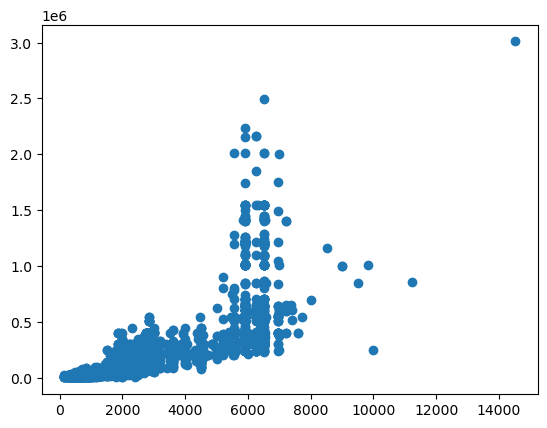

<Figure size 1e+07x600 with 0 Axes>

In [309]:
plt.scatter(x,y)
plt.figure(figsize=(100000, 6))
plt.show()

Crucial part - Test Train split

In [310]:
x_train , x_test,y_train,Y_test = train_test_split(x,y , train_size = 0.8, random_state = 5)
print(f"the no of training rows =  {x_train.shape[0]}")
print(f"the number of testing rows = {x_test.shape[0]}")

the no of training rows =  4000
the number of testing rows = 1000


In [312]:
x_train 

,house_size
house_type,
3 BHK Apartment,1900
4 BHK Independent Floor,5896
3 BHK Apartment,1800
3 BHK Apartment,1375
3 BHK Independent Floor,2500
...,...
3 BHK Independent Floor,2856
4 BHK Independent Floor,3150
3 BHK Independent Floor,2000


In [315]:
y_train

house_type
3 BHK Apartment              35000
4 BHK Independent Floor     301102
3 BHK Apartment              29000
3 BHK Apartment              50000
3 BHK Independent Floor      80000
                             ...  
3 BHK Independent Floor     301022
4 BHK Independent Floor     115000
3 BHK Independent Floor      55000
5 BHK Independent Floor     301012
3 BHK Independent Floor     274181
Name: price, Length: 4000, dtype: int64

Training our Regression model

In [317]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [319]:
y_predictions = model.predict(x_train)
y_pred = model.predict(x_test)

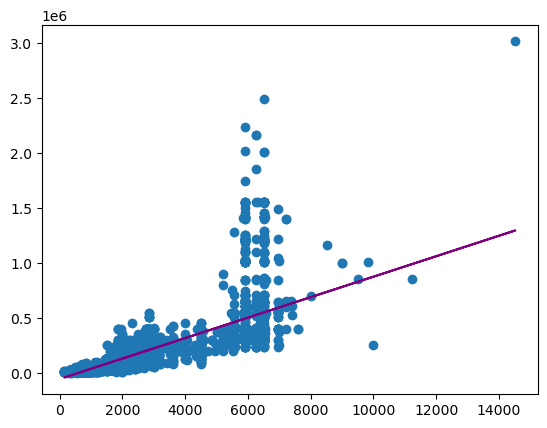

In [321]:
plt.scatter(x_train, y_train, label='initial data')
plt.plot(x_train, y_predictions, color='purple', label='Linear Regression Fit')


Visualizing our predictions vs True values

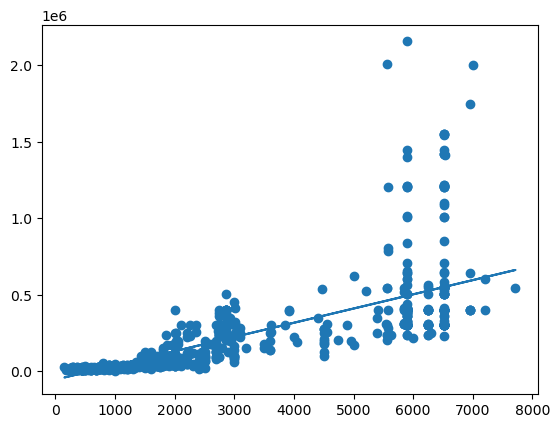

In [322]:
plt.plot(x_test , y_pred)
plt.scatter(x_test , Y_test)
plt.show()

In [325]:
r_square = model.score(x_test, Y_test)

In [327]:
r_square

0.5320142598202311